# Battery EIS dataset exploration

## Setup

In [1]:
# Fastai is required by eb_ml_battery_lib
!pip install fastai==2.5.3 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastbook 0.0.26 requires fastai>=2.6, but you have fastai 2.5.3 which is incompatible.


In [2]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns;

In [3]:
# Load EB_ML python libraries
# The following libraries are used in this notebook and should be installed in your local machine before running this notebook.
# eb_colab_utils.py
# eb_ml_battery_lib.py
# eb_ml_utils.py

# path to load external *.py files used in this notebook
# Note: in Google Colab virtual machine you shoud copy the files in "/content" folder after BEFORE running this notebook's cell
external_python_file_path='../src'
sys.path.append(external_python_file_path)


from eb_ml_colab_utils import get_root_path,copy_model_to_google_drive
from eb_ml_battery_lib import load_soc_dataset
from eb_ml_utils import show_pair_plot,show_coorelation_plot

In [4]:
#configuration dictionary
config ={}

# Root working folder (local or Google Drive)
# config['ROOT_DIR'] = get_root_path("batterie")
config['ROOT_DIR'] = get_root_path("../")  

# Folder with dataset in CSV format
#config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets"
config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets/EIS-vs-SOC-May2022"

# List of SoC level into dataset
#config['soc_list']=['100','090','080','070','060','050','040','030','020','010']
config['soc_list']=['100','090','080','070','060','050','040','030','020','010']


NOT running on COLAB


## Basic data exploration - (Single battery - data from battery 02)

In [5]:
# Data acquition file to load from dateset folder
battery_list=["02_1","02_2","02_3","02_4","02_5","02_6","02_7","02_8","02_9"]

In [6]:
dataset,feature_col_names=load_soc_dataset(battery_list,config["soc_list"],config['DATASETS_DIR'])

c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\../src\eb_ml_battery_lib.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset= dataset.append(df_rows)
c:\gitrepos\ml-4-measurement\notebooks\.

In [7]:
dataset.reset_index(drop=True,inplace=True)
dataset['SOC_category'] = dataset.SOC.astype('category')

In [8]:
row_number=dataset.shape[0]
dataset.describe()

,Z_f0,Z_f1,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9,Z_f10,Z_f11,Z_f12,Z_f13
count,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j,90.00000+0.00000j
mean,0.098181-0.005001j,0.096507-0.003977j,0.095383-0.002832j,0.094782-0.002262j,0.093604-0.002295j,0.092843-0.002748j,0.091782-0.003379j,0.089452-0.004758j,0.086883-0.005741j,0.083907-0.006249j,0.079837-0.006132j,0.077002-0.005586j,0.074556-0.004759j,0.072027-0.003429j
std,0.016788+0.000000j,0.016616+0.000000j,0.016471+0.000000j,0.016356+0.000000j,0.016145+0.000000j,0.015928+0.000000j,0.015630+0.000000j,0.015145+0.000000j,0.014793+0.000000j,0.014490+0.000000j,0.014200+0.000000j,0.013991+0.000000j,0.013824+0.000000j,0.013610+0.000000j
min,0.064123-0.003129j,0.062851-0.002548j,0.062117-0.001792j,0.061998-0.001300j,0.061108-0.001587j,0.060769-0.001721j,0.060420-0.002065j,0.058980-0.002957j,0.057408-0.003769j,0.055408-0.004586j,0.052218-0.004757j,0.049936-0.004607j,0.047889-0.003867j,0.045732-0.002743j
25%,0.100935-0.004008j,0.099597-0.003072j,0.098430-0.002521j,0.098001-0.002401j,0.096939-0.002460j,0.096043-0.002506j,0.095153-0.002672j,0.093414-0.004004j,0.091298-0.004991j,0.088694-0.005761j,0.084818-0.005903j,0.082131-0.005352j,0.079704-0.004750j,0.077043-0.003789j
50%,0.104772-0.004021j,0.103292-0.003562j,0.101802-0.002296j,0.101349-0.002331j,0.100260-0.001643j,0.099655-0.002537j,0.098623-0.002880j,0.096731-0.004267j,0.093906-0.005391j,0.090972-0.006164j,0.086812-0.006407j,0.083904-0.005704j,0.081343-0.004846j,0.078727-0.003362j
75%,0.107218-0.006529j,0.105056-0.005217j,0.103962-0.002479j,0.103384-0.002580j,0.102149-0.002398j,0.101465-0.002771j,0.100434-0.003055j,0.098016-0.004448j,0.095395-0.005944j,0.092365-0.005964j,0.088041-0.006818j,0.085003-0.005862j,0.082404-0.005024j,0.079706-0.003529j
max,0.122604-0.007702j,0.119806-0.006500j,0.117896-0.005398j,0.116326-0.005284j,0.113123-0.006122j,0.111734-0.004291j,0.109821-0.006280j,0.105429-0.008814j,0.100346-0.010365j,0.095419-0.007102j,0.091249-0.006766j,0.088219-0.006022j,0.085772-0.005352j,0.082867-0.003711j


In [9]:
dataset

,SOC,BATTERY_ID,EIS_ID,Z_f0,Z_f1,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9,Z_f10,Z_f11,Z_f12,Z_f13,SOC_category
0,100,02,02_1,0.072063-0.004374j,0.071036-0.002984j,0.070496-0.002075j,0.069746-0.001801j,0.069018-0.001827j,0.068709-0.002171j,0.067837-0.003178j,0.065635-0.004911j,0.062890-0.006280j,0.059486-0.006863j,0.054928-0.006676j,0.051825-0.005901j,0.049388-0.004803j,0.046947-0.003259j,100
1,090,02,02_1,0.069160-0.004866j,0.067766-0.003580j,0.066580-0.002556j,0.066140-0.001878j,0.065099-0.001670j,0.064835-0.001832j,0.064022-0.002671j,0.062497-0.003895j,0.060474-0.004868j,0.057776-0.005650j,0.053822-0.005650j,0.051116-0.005202j,0.048720-0.004230j,0.046498-0.003104j,090
2,080,02,02_1,0.067677-0.005082j,0.066169-0.003861j,0.065113-0.002713j,0.064482-0.001987j,0.063490-0.001727j,0.063023-0.001831j,0.062371-0.002154j,0.061095-0.003355j,0.059224-0.004278j,0.056882-0.005143j,0.053280-0.005332j,0.050884-0.004752j,0.048604-0.004016j,0.046463-0.002844j,080
3,070,02,02_1,0.066962-0.005228j,0.065319-0.003951j,0.064134-0.002841j,0.063563-0.002071j,0.062504-0.001687j,0.062042-0.001808j,0.061642-0.002141j,0.060228-0.003131j,0.058509-0.004092j,0.056229-0.004866j,0.053053-0.004960j,0.050620-0.004567j,0.048457-0.003954j,0.046490-0.002702j,070
4,060,02,02_1,0.066863-0.004278j,0.064775-0.004254j,0.063218-0.002659j,0.063038-0.001863j,0.062056-0.001498j,0.061629-0.001564j,0.061272-0.001818j,0.060005-0.002935j,0.058264-0.003973j,0.056300-0.004616j,0.052981-0.005034j,0.050495-0.004402j,0.048557-0.003799j,0.046563-0.002580j,060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,050,02,02_9,0.100901-0.004058j,0.099489-0.003159j,0.098361-0.002241j,0.098046-0.001646j,0.097126-0.001766j,0.096732-0.002107j,0.096320-0.002634j,0.094033-0.003700j,0.092283-0.004557j,0.089730-0.005288j,0.086221-0.005534j,0.083520-0.005051j,0.081324-0.004534j,0.078732-0.003225j,050
86,040,02,02_9,0.101036-0.003861j,0.099920-0.002810j,0.099115-0.001984j,0.098922-0.001434j,0.098010-0.001497j,0.097516-0.001873j,0.097106-0.002699j,0.094894-0.004111j,0.092895-0.004871j,0.090186-0.005497j,0.086702-0.005583j,0.084174-0.005194j,0.081620-0.004625j,0.079288-0.003455j,040
87,030,02,02_9,0.102393-0.003688j,0.101233-0.002940j,0.100460-0.002009j,0.100250-0.001490j,0.099465-0.001722j,0.098749-0.002102j,0.097917-0.002800j,0.095842-0.004414j,0.093611-0.005320j,0.090621-0.005730j,0.087067-0.005633j,0.084500-0.005306j,0.082101-0.004529j,0.079644-0.003359j,030
88,020,02,02_9,0.105715-0.004282j,0.104272-0.003556j,0.103228-0.002460j,0.102998-0.001914j,0.101745-0.002301j,0.101106-0.002877j,0.099576-0.003658j,0.096865-0.005093j,0.094100-0.005542j,0.091128-0.005788j,0.087650-0.005772j,0.085030-0.005351j,0.082625-0.004540j,0.080108-0.003338j,020


Analizzo separatamente Parte Real e Parte Immaginaria

In [24]:
df=dataset[feature_col_names]
df_real= df.apply(lambda col: col.apply(lambda val: np.real(val)))
df_img= df.apply(lambda col: col.apply(lambda val: np.imag(val)))

df_real['SOC_float'] = dataset.SOC.astype('float')
df_real['SOC']= dataset['SOC']
df_real['SOC_category'] =  dataset['SOC_category']
df_img['SOC_float'] = dataset.SOC.astype('float')
df_img['SOC']= dataset['SOC']
df_img['SOC_category'] = dataset['SOC_category']


In [11]:
df_img.describe()

,Z_f0,Z_f1,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9,Z_f10,Z_f11,Z_f12,Z_f13
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,-0.005001,-0.003977,-0.002832,-0.002262,-0.002295,-0.002748,-0.003379,-0.004758,-0.005741,-0.006249,-0.006132,-0.005586,-0.004759,-0.003429
std,0.001116,0.000993,0.000764,0.000745,0.000902,0.001106,0.001230,0.001219,0.001102,0.001002,0.000743,0.000612,0.000499,0.000361
min,-0.007702,-0.006500,-0.005398,-0.005284,-0.006122,-0.007341,-0.007834,-0.008814,-0.010365,-0.010190,-0.009053,-0.007650,-0.006336,-0.004275
25%,-0.005991,-0.004996,-0.003422,-0.002657,-0.002521,-0.002893,-0.003676,-0.005331,-0.006308,-0.006719,-0.006577,-0.005923,-0.005049,-0.003658
50%,-0.004913,-0.003771,-0.002722,-0.002144,-0.002289,-0.002617,-0.003137,-0.004506,-0.005578,-0.006101,-0.006100,-0.005636,-0.004784,-0.003501
75%,-0.004074,-0.003162,-0.002174,-0.001707,-0.001723,-0.002103,-0.002699,-0.004031,-0.005009,-0.005643,-0.005634,-0.005215,-0.004530,-0.003263
max,-0.002348,-0.001948,-0.001598,-0.001184,-0.001010,-0.001248,-0.001729,-0.002914,-0.003769,-0.004541,-0.004732,-0.004319,-0.003678,-0.002580


In [12]:
df_real.describe()

,Z_f0,Z_f1,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9,Z_f10,Z_f11,Z_f12,Z_f13
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.098181,0.096507,0.095383,0.094782,0.093604,0.092843,0.091782,0.089452,0.086883,0.083907,0.079837,0.077002,0.074556,0.072027
std,0.016751,0.016586,0.016453,0.016339,0.016119,0.015890,0.015581,0.015096,0.014752,0.014455,0.014181,0.013977,0.013815,0.013605
min,0.064123,0.062851,0.062117,0.061998,0.061108,0.060769,0.060420,0.058980,0.057408,0.055408,0.052218,0.049936,0.047889,0.045732
25%,0.100935,0.099597,0.098430,0.098001,0.096939,0.096043,0.095153,0.093414,0.091298,0.088694,0.084818,0.082131,0.079704,0.077043
50%,0.104772,0.103292,0.101802,0.101349,0.100260,0.099655,0.098623,0.096731,0.093906,0.090972,0.086812,0.083904,0.081343,0.078727
75%,0.107218,0.105056,0.103962,0.103384,0.102149,0.101465,0.100434,0.098016,0.095395,0.092365,0.088041,0.085003,0.082404,0.079706
max,0.122604,0.119806,0.117896,0.116326,0.113123,0.111734,0.109821,0.105429,0.100346,0.095419,0.091249,0.088219,0.085772,0.082867


In [25]:
df_real.columns[:-2]

Index(['Z_f0', 'Z_f1', 'Z_f2', 'Z_f3', 'Z_f4', 'Z_f5', 'Z_f6', 'Z_f7', 'Z_f8',
       'Z_f9', 'Z_f10', 'Z_f11', 'Z_f12', 'Z_f13', 'SOC_float'],
      dtype='object')

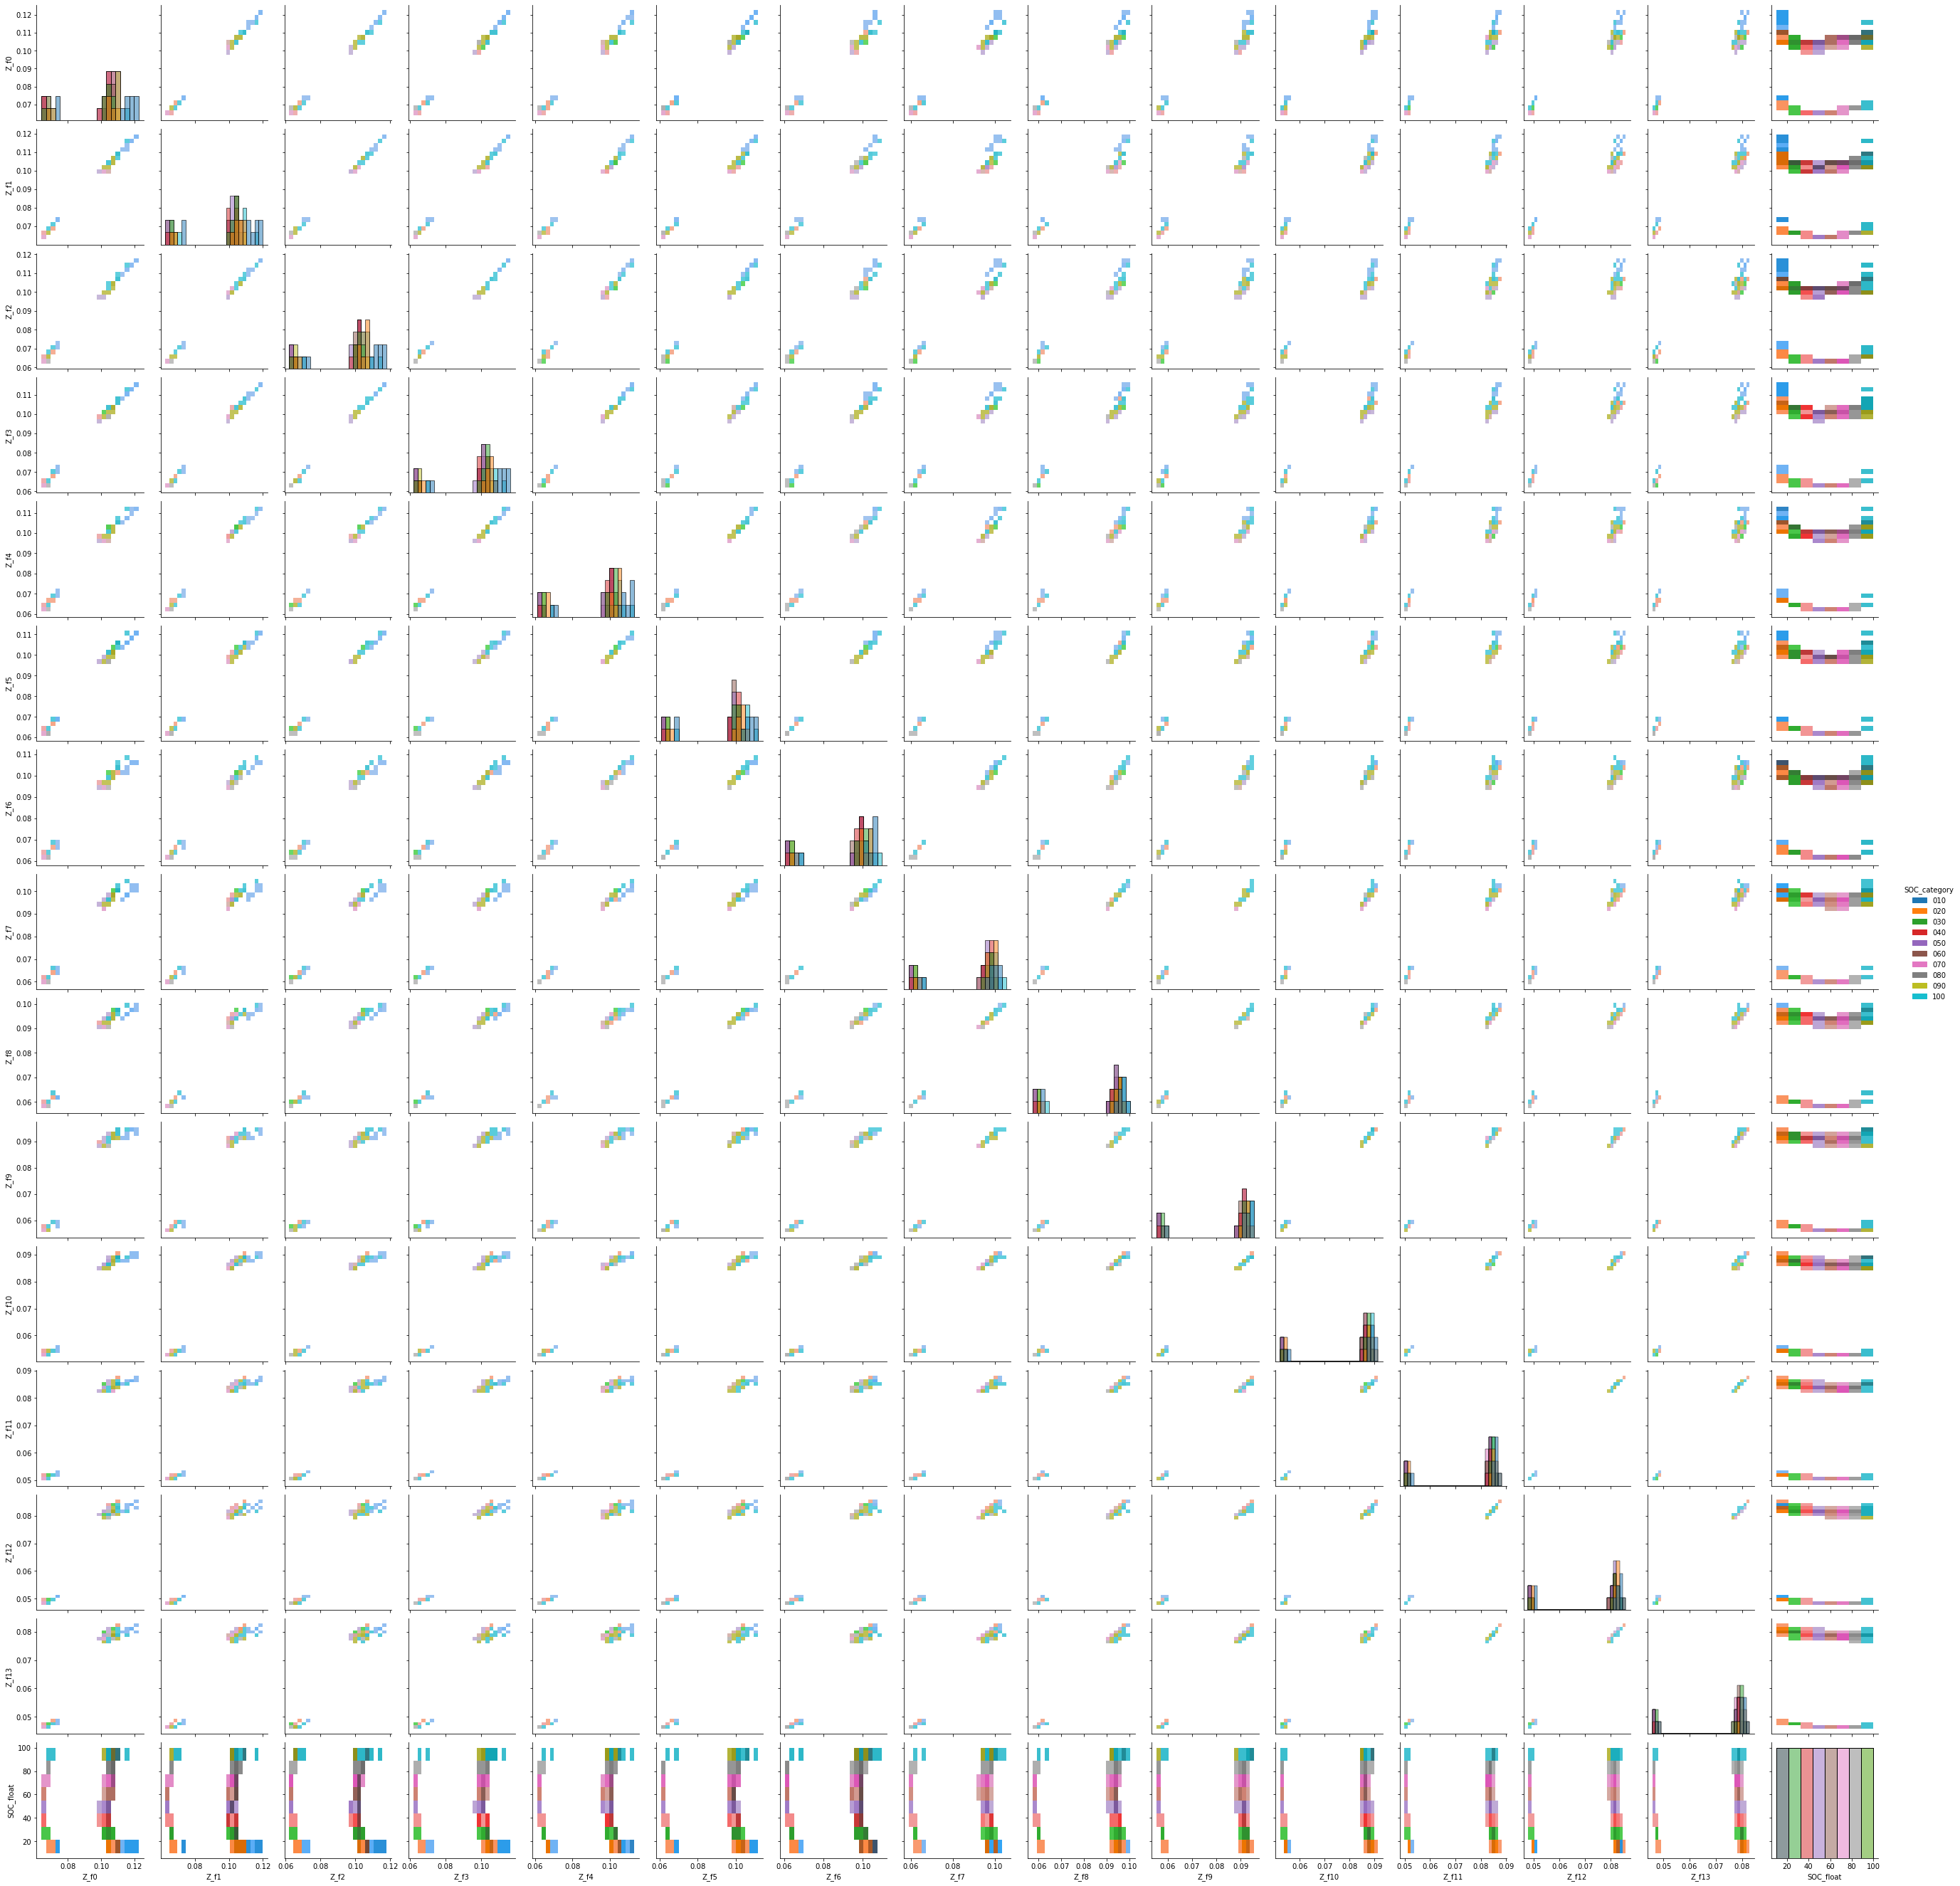

In [26]:
show_pair_plot(df_real,df_real.columns[:-2],'SOC_category',title="Real part of Z_f features")

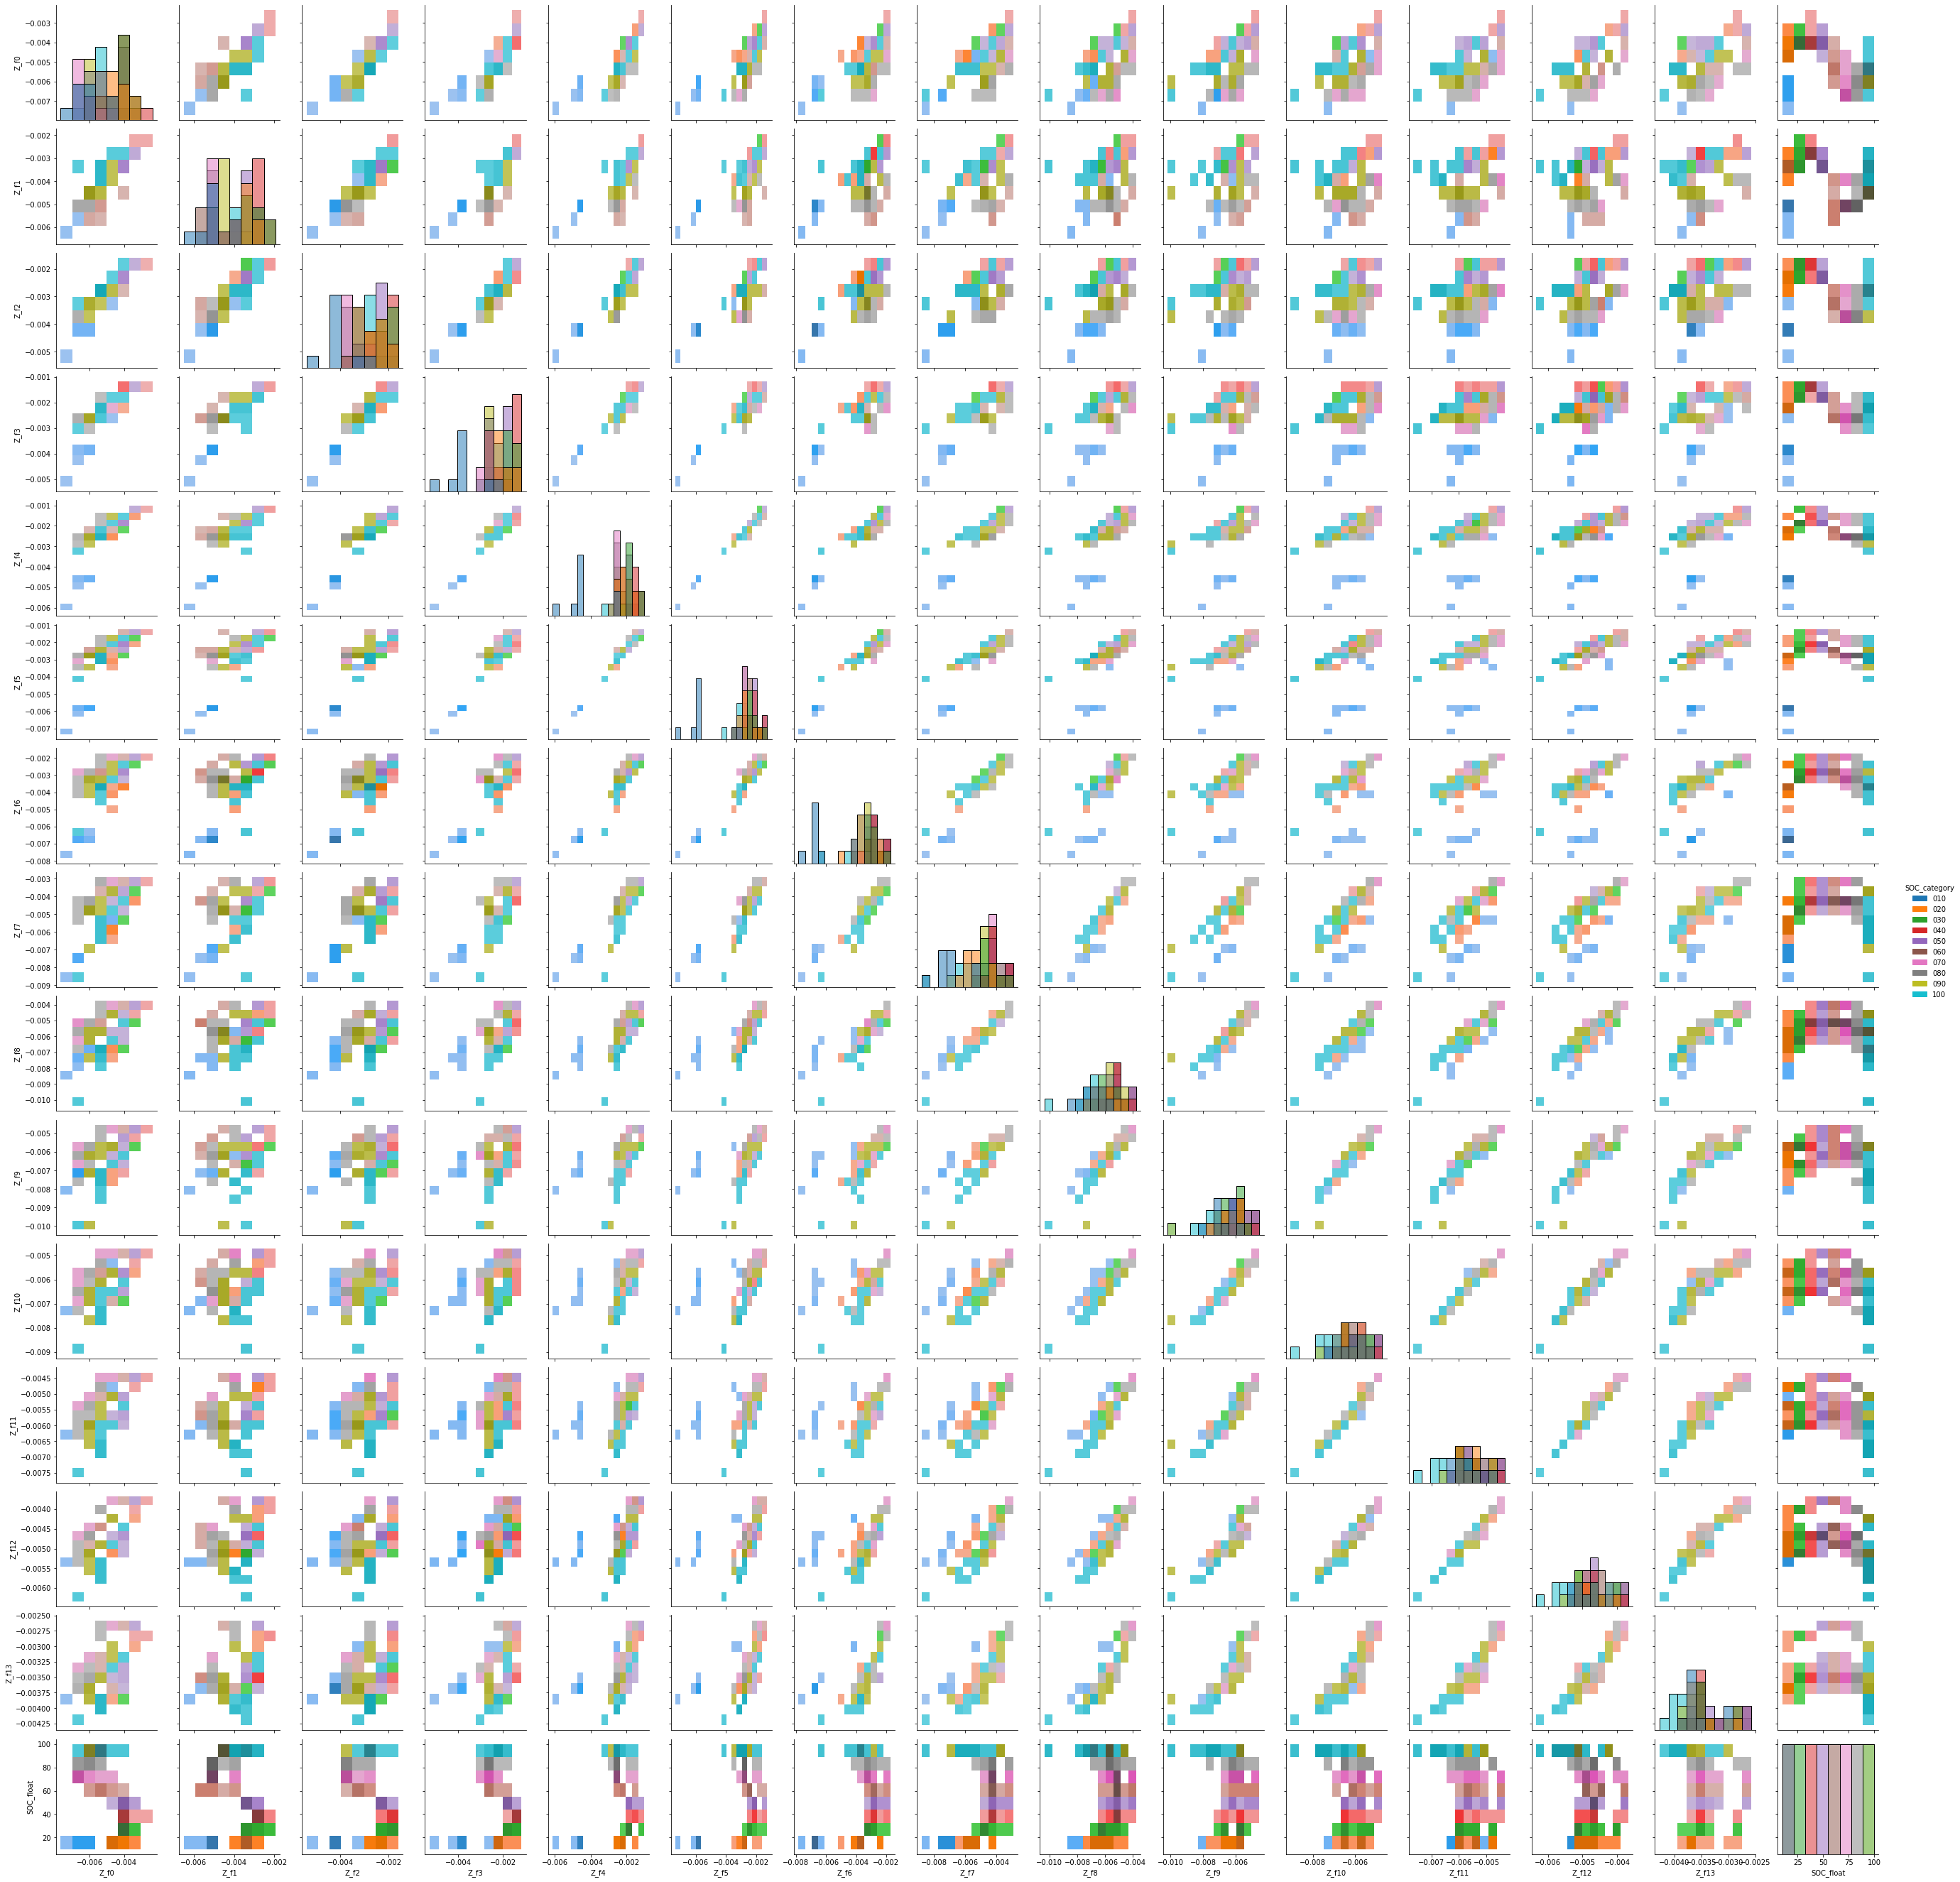

In [27]:
show_pair_plot(df_img,df_img.columns[:-2],'SOC_category',title="Imaginary part of Z_f features")

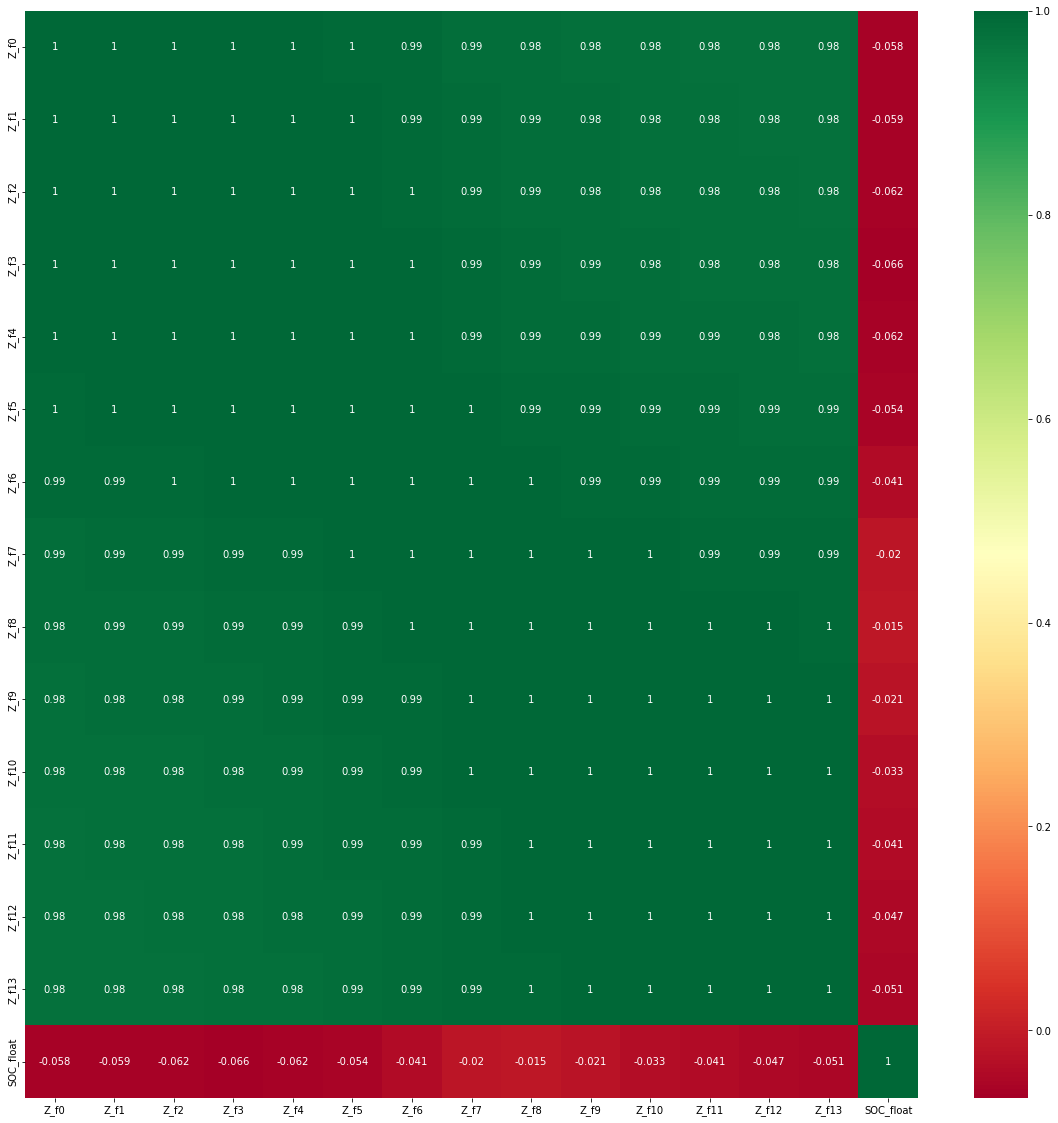

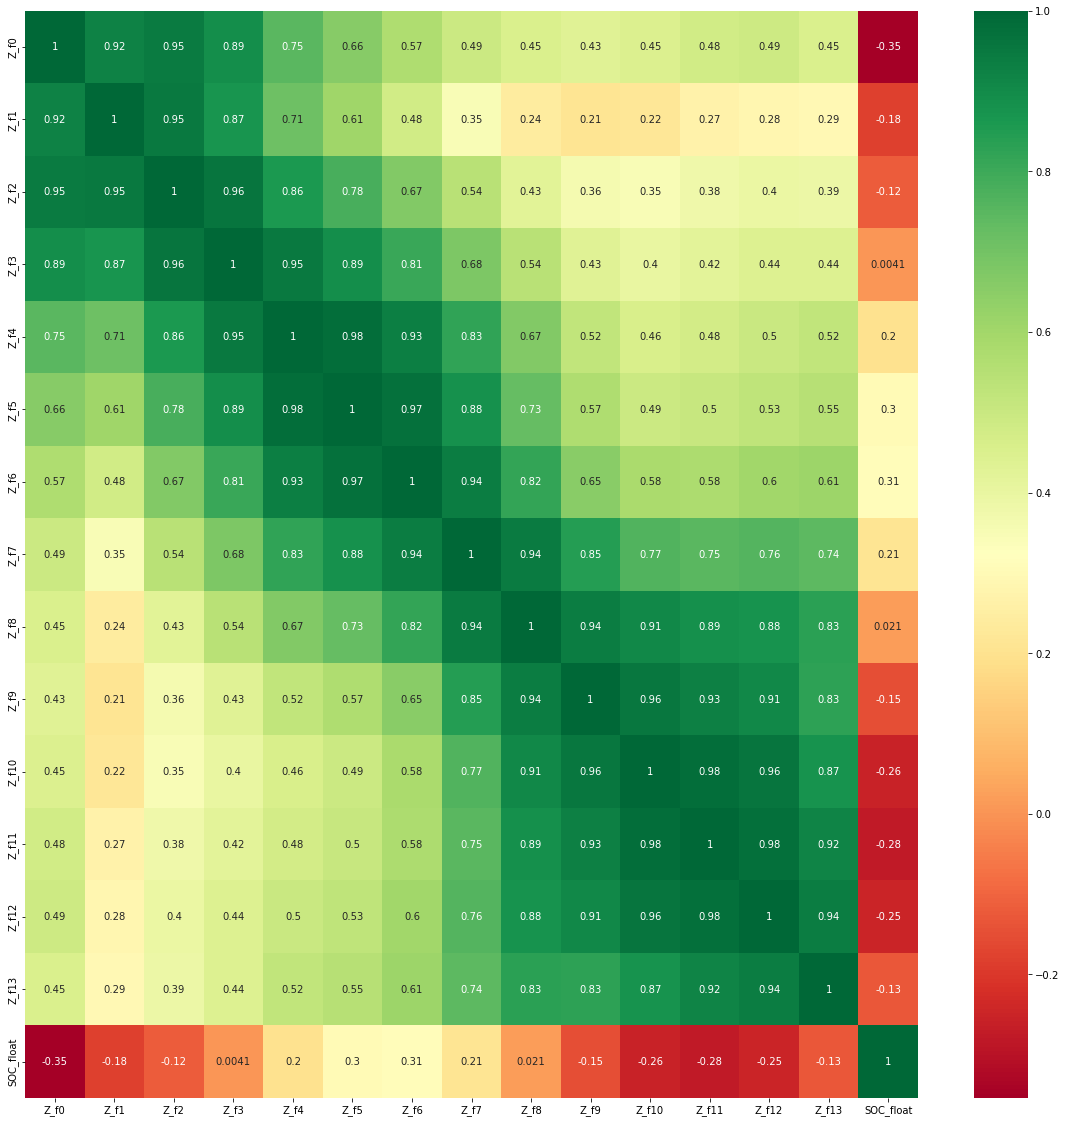

In [28]:

show_coorelation_plot(df_real)
show_coorelation_plot(df_img)

## Data Models

Most of datasets can be best modeled with two methods:

1. For structured data (such as tabular data) => Ensembles of decision trees (i.e., random forests and gradient boosting machines)
2. For unstructured data (such as audio, images, chats) => Multilayer neural networks trained with SGD (i.e., shallow and/or deep learning)

Although deep learning is nearly always clearly superior for unstructured data, these two approaches tend to give quite similar results for many kinds of structured data. But ensembles of decision trees tend to train faster, are often easier to interpret, do not require special GPU hardware for inference at scale, and often require less hyperparameter tuning. They have also been popular for quite a lot longer than deep learning, so there is a more mature ecosystem of tooling and documentation around them.

Most importantly, the critical step of interpreting a model of tabular data is significantly easier for decision tree ensembles. 

## Tabular data analysis

### setup

In [17]:
!pip install -Uqq waterfallcharts treeinterpreter dtreeviz

from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *

### TabularPandas

In [36]:
dataset['SOC_float'] = dataset.SOC.astype('float')
df_common=dataset[['SOC','SOC_float','BATTERY_ID','EIS_ID']]
dataset_rect= df_real.join(df_img,lsuffix='_real' , rsuffix="_imag")
dataset_rect= df_common.join(dataset_rect)
#print(dataset_rect)

feature_col_names_rect= list()
for feat_name in feature_col_names:
    feature_col_names_rect.append(feat_name+"_real")
    feature_col_names_rect.append(feat_name+"_imag")


In [38]:
#Path / default location for saving/loading models
model_path = config['ROOT_DIR']+"/models"

#The dependent variable/target
dep_var = 'SOC_float'

#The list of categorical features in the dataset 
cat = [] 

# List of TabularProcs transforms to apply to the dataset
procs=[Categorify,FillMissing,Normalize]

# Train/Validation split strategy
splits = RandomSplitter(valid_pct=0.2)(range_of(dataset_rect))

# list of numerical variable
cont= feature_col_names_rect

In [39]:
to = TabularPandas(dataset_rect, procs, cat, cont, y_names=dep_var, splits=splits)

A `TabularPandas` object is similar to a fastai `Datasets` object, including `train` and `valid` attributes:

In [40]:
len(to.train),len(to.valid)

(72, 18)

In [41]:
to.show(3)

,Z_f0_real,Z_f0_imag,Z_f1_real,Z_f1_imag,Z_f2_real,Z_f2_imag,Z_f3_real,Z_f3_imag,Z_f4_real,Z_f4_imag,Z_f5_real,Z_f5_imag,Z_f6_real,Z_f6_imag,Z_f7_real,Z_f7_imag,Z_f8_real,Z_f8_imag,Z_f9_real,Z_f9_imag,Z_f10_real,Z_f10_imag,Z_f11_real,Z_f11_imag,Z_f12_real,Z_f12_imag,Z_f13_real,Z_f13_imag,SOC_float
79,0.113213,-0.006063,0.110978,-0.005009,0.109556,-0.004152,0.108466,-0.003772,0.106242,-0.004505,0.104345,-0.005660,0.101439,-0.006548,0.096939,-0.006841,0.093860,-0.006671,0.091033,-0.006401,0.087120,-0.005866,0.084622,-0.005560,0.081982,-0.004724,0.079562,-0.003638,10.0
76,0.100106,-0.003759,0.099064,-0.002893,0.098293,-0.001812,0.097984,-0.001490,0.097473,-0.001552,0.096724,-0.001971,0.095956,-0.002726,0.094295,-0.004154,0.091886,-0.005090,0.089269,-0.005612,0.085497,-0.005740,0.082806,-0.005337,0.080282,-0.004625,0.077861,-0.003469,40.0
32,0.107165,-0.006332,0.105013,-0.004916,0.103722,-0.003520,0.102852,-0.002799,0.101211,-0.002509,0.100603,-0.002884,0.099887,-0.003352,0.097424,-0.004753,0.094689,-0.005986,0.091708,-0.006719,0.087129,-0.006657,0.084112,-0.005922,0.081609,-0.005056,0.078829,-0.003442,80.0


In [42]:
#save
#save_pickle(path/'to.pkl',to)
#load back
#to = (path/'to.pkl').load()

# Tree Based Feature Selection

## Decision Tree

define independent and dependent variables

In [43]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [53]:
m = DecisionTreeRegressor(max_leaf_nodes=10)
m.fit(xs, y);

In [54]:
from sklearn.tree import export_graphviz
import IPython, graphviz
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """Draws a representation of a random forest in IPython."""
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

We can display the tree using Fastai draw_tree helper function

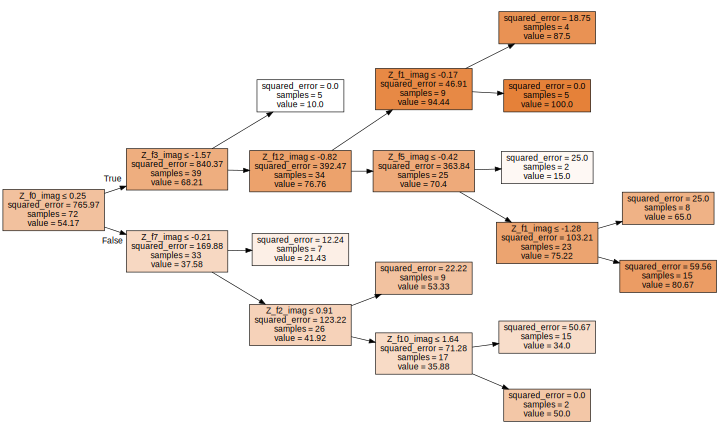

In [55]:
draw_tree(m, xs, size=10, precision=2)

The top node represents the initial model before any splits have been done, when all the data is in one group. This is the simplest possible model. It is the result of asking zero questions and will always predict the value to be the average value of the whole dataset. The decision tree algorithm has successfully split our EIS records into groups which differ in value significantly.

We can show the same information using Terence Parr's powerful dtreeviz library:

In [56]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ExecutableNotFound: failed to execute ['dot', '-Tsvg', '-o', 'C:\\Users\\EMANUE~1.BUC\\AppData\\Local\\Temp\\DTreeViz_24792.svg', 'C:/Users/EMANUE~1.BUC/AppData/Local/Temp\\DTreeViz_24792'], make sure the Graphviz executables are on your systems' PATH

function to check the root mean squared error of our model (m_rmse)

In [58]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [86]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [87]:
print('rmse for training dataset ', str(m_rmse(m, xs, y)))

rmse for training dataset  0.0


In [88]:
print('rmse for validation dataset ', str(m_rmse(m, valid_xs, valid_y)))

rmse for validation dataset  30.0


In [89]:
m.get_n_leaves(), len(xs)

(25, 72)

In [94]:
m = DecisionTreeRegressor(min_samples_leaf=2)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(2.307396, 22.072412)

## Random Forest

In [104]:
def rf(xs, y, n_estimators=20, max_samples=len(xs),
       max_features=0.5, min_samples_leaf=2, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [105]:
m = rf(xs, y);

In [106]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(7.958637, 24.132774)

Show the impact of estimators in forest

In [107]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\skl

In [108]:
r_mse(preds.mean(0), valid_y)

24.132774

Plot RMSE vs number of estimators

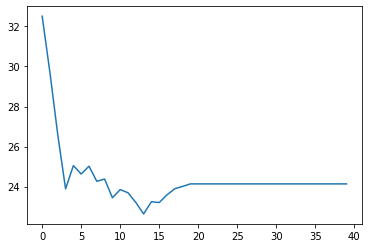

In [109]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

### Out-Of-Bag-Error

Recall that in a random forest, each tree is trained on a different subset of the training data. The OOB error is a way of measuring prediction error on the training set by only including in the calculation of a row's error trees where that row was not included in training. This allows us to see whether the model is overfitting, without needing a separate validation set

In [110]:
r_mse(m.oob_prediction_, y)

18.909608

## Model Interpretation

###  Prediction Confidence

The model averages the individual tree's predictions to get an overall prediction. The standard deviation of predictions across the trees, instead of just the mean tells us the relative confidence of predictions.

In [111]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\emanuele.buchicchio\Anaconda3\lib\site-packages\skl

In [112]:
preds.shape

(20, 18)

Using this we can get the standard deviation of the predictions over all the trees, for each EIS

In [113]:
preds_std = preds.std(0)

the standard deviations for the predictions for the first 10 EIS

In [115]:
preds_std[:10]

array([ 8.29291867, 20.49322381,  9.10416571, 25.75980935, 15.60807083,
        8.45699907,  8.54729896,  8.21108245,  8.97810222, 18.41643288])

### Feature Importance

 We can get these directly from sklearn's random forest by looking in the `feature_importances_` attribute. Here two helper function to visualize and sort.

The feature importance algorithm loops through each tree, and then recursively explores each branch. At each branch, it looks to see what feature was used for that split, and how much the model improves as a result of that split. The improvement (weighted by the number of rows in that group) is added to the importance score for that feature. This is summed across all branches of all trees, and finally the scores are normalized such that they add to 1.

In [119]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [120]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
5,Z_f2_imag,0.246260
1,Z_f0_imag,0.188098
11,Z_f5_imag,0.073370
7,Z_f3_imag,0.061142
3,Z_f1_imag,0.045182
13,Z_f6_imag,0.044793
26,Z_f13_real,0.037947
15,Z_f7_imag,0.037588
27,Z_f13_imag,0.036685
24,Z_f12_real,0.036084


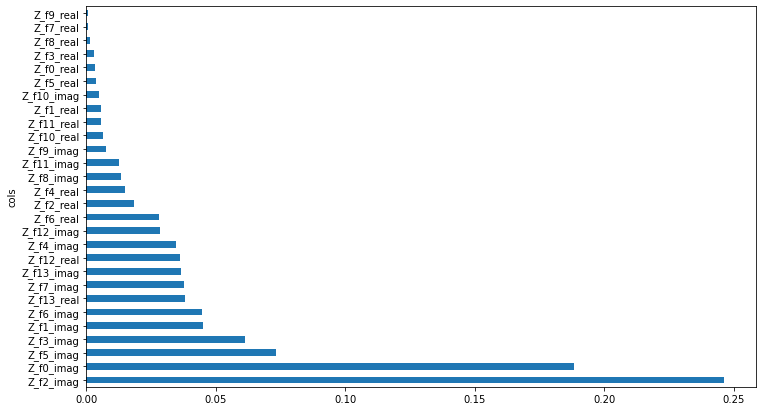

In [121]:
plot_fi(fi[:30]);

### Removing Low-Importance Variables

It seems likely that we could use just a subset of the columns by removing the variables of low importance and still get good results. Let's drop features with importance below than 0.03:

In [138]:
to_keep = fi[fi.imp>0.03].cols
len(to_keep)

11

In [140]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]
m = rf(xs_imp, y)
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(8.232254, 24.82339)

Our accuracy is about the same, but we have far fewer columns to study:

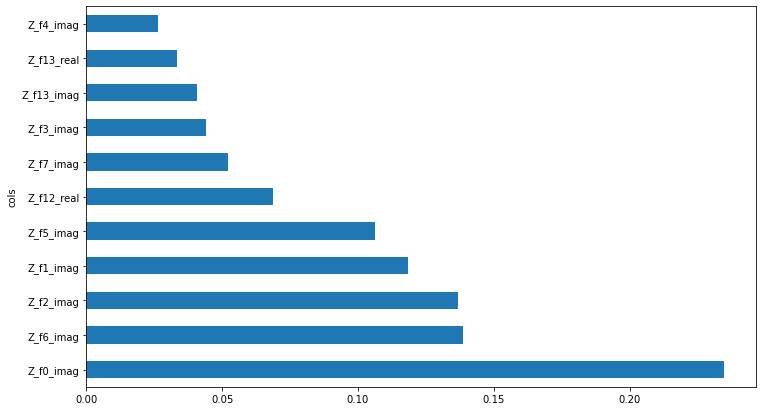

In [141]:
plot_fi(rf_feat_importance(m, xs_imp));

## Removing Redundant Features

In [145]:
#from https://github.com/fastai/fastbook/blob/master/utils.py
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

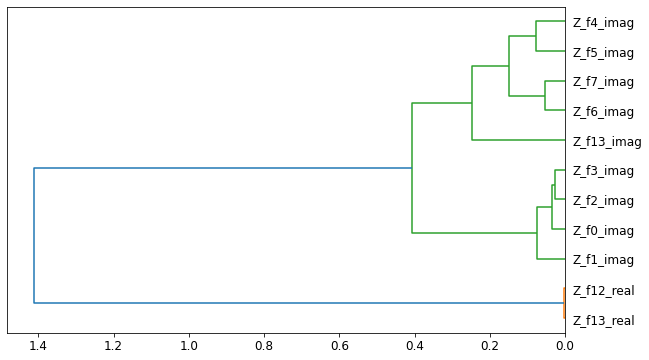

In [146]:
cluster_columns(xs_imp)

In this chart, the pairs of columns that are most similar are the ones that were merged together early, far from the "root" of the tree at the left. 

The most similar pairs are found by calculating the rank correlation, which means that all the values are replaced with their rank (i.e., first, second, third, etc. within the column), and then the correlation is calculated.

Let's try removing some of these closely related features to see if the model can be simplified without impacting the accuracy. First, we create a function that quickly trains a random forest and returns the OOB score, by using a lower max_samples and higher min_samples_leaf. The OOB score is a number returned by sklearn that ranges between 1.0 for a perfect model and 0.0 for a random model. (In statistics it's called R^2, although the details aren't important for this explanation.) We don't need it to be very accurate—we're just going to use it to compare different models, based on removing some of the possibly redundant columns:

In [161]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5,
        max_samples=len(xs_imp), max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [162]:
get_oob(xs_imp)

0.5348801113314319

Now we try removing each of our potentially redundant variables, one at a time:


In [163]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'Z_f12_real', 'Z_f3_imag','Z_f4_imag','Z_f7_imag')}

{'Z_f12_real': 0.5080947982840673,
 'Z_f3_imag': 0.46372078670212324,
 'Z_f4_imag': 0.5030535146531083,
 'Z_f7_imag': 0.46511284413719733}

Now let's try dropping multiple variables. We'll drop one from each of the tightly aligned pairs we noticed earlier

In [167]:
to_drop = ['Z_f12_real', 'Z_f4_imag','Z_f3_imag','Z_f7_imag']
get_oob(xs_imp.drop(to_drop, axis=1))

0.5326681752201139

In [168]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [169]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(8.153901, 24.106902)

### Partial Dependence

TODO

## Tree Interpreter

In [170]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [171]:
row = valid_xs_final.iloc[:5]

In [172]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [173]:
prediction[0], bias[0], contributions[0].sum()

(array([35.15119048]), 52.62500000000002, -17.47380952380952)

The clearest way to display the contributions is with a waterfall plot. This shows how the positive and negative contributions from all the independent variables sum up to create the final prediction, which is the righthand column labeled "net" 

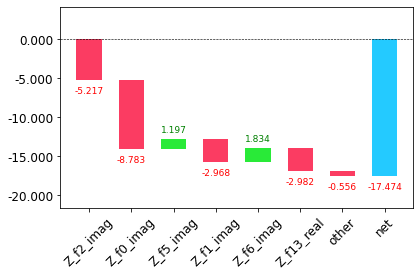

In [174]:
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

# t-distributed stochastic neighbor embedding (t-SNE) - dimensionality reduction

TODO

# Principal Component Analysis (PCA).

TODO